Run this in a terminal to make sure the shared folder is mounted (only at the beginning when booting up the VM.)

    sudo mount -t vboxsf -o uid=$UID,gid=$(id -g) simulation_results ~/Documents/sf_simulation_results/

Then compile the Mesenchymal Condensation Simulation app using make.

In [79]:
%%bash
cd ../chaste_build/
make MesenchymalCondensationSimulation

[  5%] Built target timekeeper
[ 11%] Built target chaste_global
[ 11%] Built target chaste_linalg
[ 16%] Built target chaste_io
[ 27%] Built target chaste_ode
[ 44%] Built target chaste_mesh
[ 44%] Built target chaste_pde
[ 88%] Built target chaste_cell_based
Scanning dependencies of target chaste_project_cartilage
[ 94%] Building CXX object projects/cartilage/CMakeFiles/chaste_project_cartilage.dir/src/simulation/modifiers/PatchSizeTrackingModifier.cpp.o
[ 94%] Linking CXX shared library libchaste_project_cartilage.so
[100%] Built target chaste_project_cartilage
[100%] Linking CXX executable MesenchymalCondensationSimulation
[100%] Built target MesenchymalCondensationSimulation


In [1]:
import sys
sys.path.append('analysis')

import numpy as np
import time 
import matplotlib.pyplot as plt
import distribute_executable as de
import sheet_metrics as sm

plt.style.use('seaborn-whitegrid')
#plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0,
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'font.size': 12}
plt.rcParams.update(params)

In [2]:
output_directory = 'exp-mesenchymal_condensation/' + time.strftime("%Y%m%d-%H%M%S") +'/'
flags = ' --sbt' # synchronized birth times
flags = flags + ' --T 100.0' # final time 100h
flags = flags + ' --sw 10' # 10 cells in x direction
flags = flags + ' --sd 20' # 20 cells in y direction
flags = flags + ' --mu 0.0' # adhesive spring stiffness set to 0 -> repulsion only
flags = flags + ' --A 0.5' # 50% of stem cells activated
flags = flags + ' --F pwq' # PWQ force
flags = flags + ' --mu_R 20.0' # set repulsive spring stiffness to 20.0
flags = flags + ' --p 0.1' # set perturbation to 0.1
flags = flags + ' --u 3.5' # set distance between boundaries to 3.5
flags = flags + ' --psl 4' # patch size limit set to 4
flags = flags + ' --g1t 10.0' # g1 phase duration for transit cells set to 30 hours (exponentially distributed)
flags = flags + ' --ds 3.0' # s phase duration for all cells set to 10 hours (fixed)
#flags = flags + ' --sc 1.05' # scale the initial configuration in x-y direction
flags = flags + ' --dt 0.004' # half the default time step


#flags = flags + ' --rdd' #random division directions

executable='/home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation'

In [3]:
de.run_simulations_multiple_random_seeds(output_directory, flags=flags, number_of_simulations=8, executable=executable)

nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200423-152406/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --dt 0.004
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200423-152406/ --S 1 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --dt 0.004
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200423-152406/ --S 2 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --dt 0.004
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimu

In [4]:
de.run_postprocessing_multiple_random_seeds(8, output_directory)

['/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200423-152406/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200423-152406/1/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200423-152406/2/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200423-152406/3/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200423-152406/4/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200423-152406/5/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200423-152406/6/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200423-152406/7/results_from_time_0/']
Starting postprocessing with 2 

IndexError: index 0 is out of bounds for axis 0 with size 0

# Testing the influence of the activation percentage

- 8 random seeds, scaling 1.1:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200422-100406/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 60.0 --p 0.1 --u 3.5 --psl 3 --g1t 10.0 --ds 3.0 --sc 1.1
- 8 random seeds, scaling 1.1:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200422-102514/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 1.0 --F pwq --mu_R 60.0 --p 0.1 --u 3.5 --psl 3 --g1t 10.0 --ds 3.0 --sc 1.1
- 8 random seeds, scaling 1.1:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200422-104541/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.25 --F pwq --mu_R 60.0 --p 0.1 --u 3.5 --psl 3 --g1t 10.0 --ds 3.0 --sc 1.1
- 8 random seeds, scaling 1.05:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200422-105447/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.25 --F pwq --mu_R 60.0 --p 0.1 --u 3.5 --psl 3 --g1t 10.0 --ds 3.0 --sc 1.05
- 8 random seeds, scaling 1.05:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200422-110326/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 60.0 --p 0.1 --u 3.5 --psl 3 --g1t 10.0 --ds 3.0 --sc 1.05
- 8 random seeds, scaling 1.05:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200422-112733/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 1.0 --F pwq --mu_R 60.0 --p 0.1 --u 3.5 --psl 3 --g1t 10.0 --ds 3.0 --sc 1.05

### For a scaling of 1.1

Text(0,0.5,'Average patch projection area')

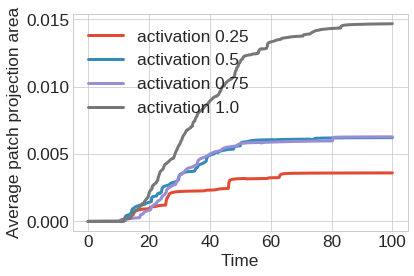

In [66]:
dir_025 = 'exp-mesenchymal_condensation/20200422-104541/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_025 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_025+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8
plt.plot(times_d, ppa_av_d, label='activation 0.25')

dir_05 = 'exp-mesenchymal_condensation/20200422-094658/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_05 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_05+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8
plt.plot(times_d, ppa_av_d, label='activation 0.5')



dir_075 = 'exp-mesenchymal_condensation/20200422-100406/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_075 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_075+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='activation 0.75')

dir_10 = 'exp-mesenchymal_condensation/20200422-102514/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_10 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_10+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='activation 1.0')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

### For a scaling of 1.05

Text(0,0.5,'Average patch projection area')

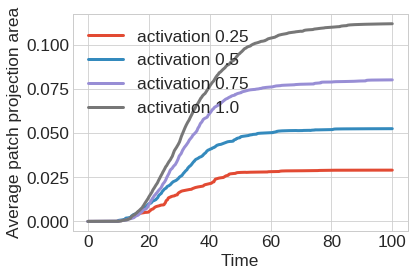

In [78]:
dir_025 = 'exp-mesenchymal_condensation/20200422-105447/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_025 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_025+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8
plt.plot(times_d, ppa_av_d, label='activation 0.25')

dir_05 = 'exp-mesenchymal_condensation/20200421-152035/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_05 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_05+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8
plt.plot(times_d, ppa_av_d, label='activation 0.5')



dir_075 = 'exp-mesenchymal_condensation/20200422-110326/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_075 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_075+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='activation 0.75')

dir_10 = 'exp-mesenchymal_condensation/20200422-112733/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_10 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_10+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='activation 1.0')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

# Testing the influence of the scaling of the initial sheet in x-y direction

- 8 random seeds (0--7):
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200421-144345/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 60.0 --p 0.1 --u 3.5 --psl 3 --g1t 10.0 --ds 3.0 --sc 1.5
- 8 random seeds :
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200421-150739/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 60.0 --p 0.1 --u 3.5 --psl 3 --g1t 10.0 --ds 3.0 --sc 1.25
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200421-152035/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 60.0 --p 0.1 --u 3.5 --psl 3 --g1t 10.0 --ds 3.0 --sc 1.05
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200422-094658/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 60.0 --p 0.1 --u 3.5 --psl 3 --g1t 10.0 --ds 3.0 --sc 1.1

Text(0,0.5,'Average patch projection area')

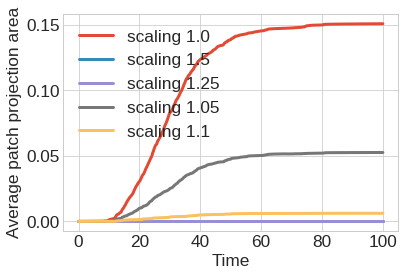

In [54]:
dir_10 = 'exp-mesenchymal_condensation/20200421-111933/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_10 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_10+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='scaling 1.0')
#plt.legend()
#plt.xlabel('Time')
#plt.ylabel('Average patch projection area')

dir_15 = 'exp-mesenchymal_condensation/20200421-144345/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_15 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_15+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='scaling 1.5')

dir_125 = 'exp-mesenchymal_condensation/20200421-144345/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_125 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_125+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8
plt.plot(times_d, ppa_av_d, label='scaling 1.25')



dir_105 = 'exp-mesenchymal_condensation/20200421-152035/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_105 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_105+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='scaling 1.05')

dir_11 = 'exp-mesenchymal_condensation/20200422-094658/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_11 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_11+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='scaling 1.1')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

# Testing the influence of the spring stiffness value

- 8 random seeds (0--7):
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200421-111933/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 60.0 --p 0.1 --u 3.5 --psl 3 --g1t 10.0 --ds 3.0
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200423-132228/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 40.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200423-144158/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200423-145920/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 10.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0
- 8 random seeds (0--7) with half the default time step
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200421-133627/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 60.0 --p 0.1 --u 3.5 --psl 3 --g1t 10.0 --ds 3.0 --dt 0.004
- 8 random seeds with half the default time step
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200423-152406/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --dt 0.004

Text(0,0.5,'Average patch projection area')

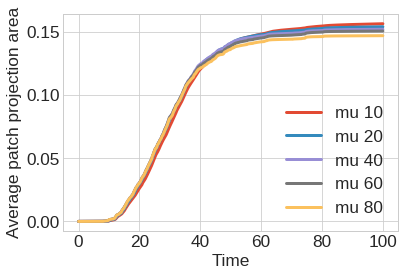

In [93]:
dir_10 = 'exp-mesenchymal_condensation/20200423-145920/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_10 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_10+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='mu 10')

dir_20 = 'exp-mesenchymal_condensation/20200423-144158/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_20 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_20+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='mu 20')

dir_40 = 'exp-mesenchymal_condensation/20200423-132228/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_40 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_40+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='mu 40')
#plt.legend()


dir_directed = 'exp-mesenchymal_condensation/20200421-111933/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='mu 60')
#plt.legend()
#plt.xlabel('Time')
#plt.ylabel('Average patch projection area')

dir_80 = 'exp-mesenchymal_condensation/20200420-112004/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_80 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_80+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='mu 80')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

Text(0,0.5,'Average patch projection area')

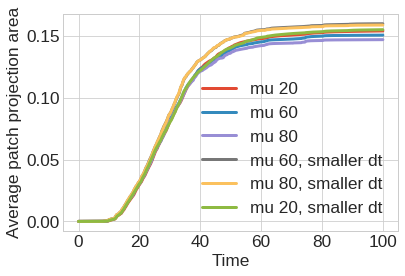

In [6]:
dir_10 = 'exp-mesenchymal_condensation/20200423-145920/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_10 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_10+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8


#plt.plot(times_d, ppa_av_d, label='mu 10')


dir_20 = 'exp-mesenchymal_condensation/20200423-144158/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_20 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_20+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='mu 20')

dir_40 = 'exp-mesenchymal_condensation/20200423-132228/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_40 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_40+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8


#plt.plot(times_d, ppa_av_d, label='mu 40')

dir_directed = 'exp-mesenchymal_condensation/20200421-111933/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='mu 60')
#plt.legend()
#plt.xlabel('Time')
#plt.ylabel('Average patch projection area')

dir_80 = 'exp-mesenchymal_condensation/20200420-112004/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_80 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_80+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='mu 80')

dir_60_half = 'exp-mesenchymal_condensation/20200421-133627/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_60_half + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_60_half+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='mu 60, smaller dt')

dir_80_half = 'exp-mesenchymal_condensation/20200421-101653/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_80_half + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_80_half+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='mu 80, smaller dt')

dir_20_half = 'exp-mesenchymal_condensation/20200423-152406/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_20_half + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_20_half+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='mu 20, smaller dt')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

#plt.xlim([10,40])

Smaller mu values have a slightly larger ppa at the end time (closer to the well-resolved runs), but also a slightly lagging increase in ppa during the transient phase. 

We note:
- for mu 20, the dynamics are well-resolved with the normal time step. The ppa is slightly less than for mu 60 and mu 80 (well-resolved runs)
- Now it would be interesting to see if this is already the case for mu 40, but I don't expect it

# Double-check the time step

- 8 random seeds (0--7):
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200421-101653/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 3.5 --psl 3 --g1t 10.0 --ds 3.0 --dt 0.004

Note: I also tried to run it with double the default time step (dt=0.016), however those runs crashed.

Text(0,0.5,'Average patch projection area')

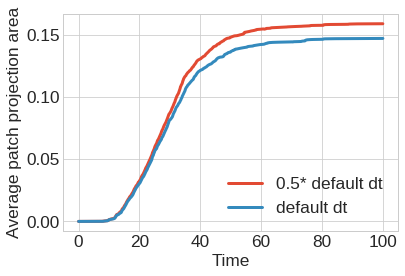

In [27]:
dir_directed = 'exp-mesenchymal_condensation/20200421-101653/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='0.5* default dt')
#plt.legend()
#plt.xlabel('Time')
#plt.ylabel('Average patch projection area')

dir_default = 'exp-mesenchymal_condensation/20200420-112004/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_default + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_default+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='default dt')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')


# Testing the influence of cell cycle phase durations

- 8 random seeds (0--7):
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200420-110510/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 3.5 --psl 3 --g1t 30.0 --ds 10.0
- 8 random seeds (0--7):
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200420-112004/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 3.5 --psl 3 --g1t 10.0 --ds 3.0
- 8 random seeds (0--7):
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200421-092351/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 3.5 --psl 3 --g1t 20.0 --ds 6.0
- 8 random seeds (0--7):
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200421-095429/ --S 0 --sbt --T 150.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 3.5 --psl 3 --g1t 20.0 --ds 6.0
        

Text(0,0.5,'Average patch projection area')

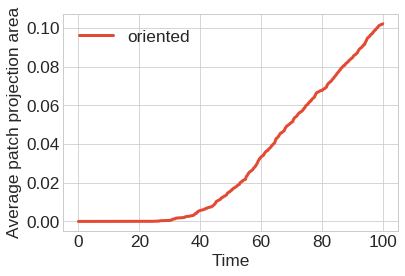

In [6]:
dir_directed = 'exp-mesenchymal_condensation/20200420-110510/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='oriented')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

Note: having a brief look at a sample simulation, not all patches have 4 cells but a large number does.

Text(0,0.5,'Average patch projection area')

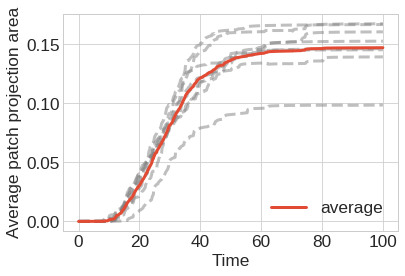

In [10]:
dir_directed = 'exp-mesenchymal_condensation/20200420-112004/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='average')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

Note: this is the average over all random seeds. It seems that there is a large variety between runs. Maybe I should visualize all of them. Okay, now that I did, I can see that the spread is not too large.

Text(0,0.5,'Average patch projection area')

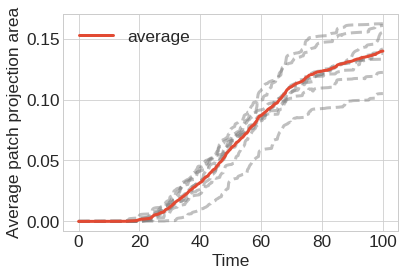

In [14]:
dir_directed = 'exp-mesenchymal_condensation/20200421-092351/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='average')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

Text(0,0.5,'Average patch projection area')

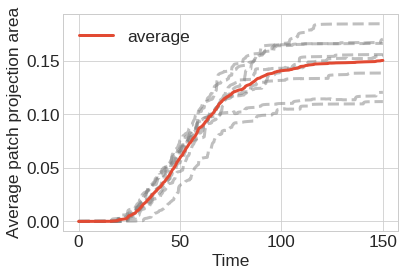

In [24]:
dir_directed = 'exp-mesenchymal_condensation/20200421-095429/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='average')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

In [3]:
dire = 'exp-mesenchymal_condensation/20200420-112004/'
de.run_postprocessing_multiple_random_seeds(8, dire)

['/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200420-112004/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200420-112004/1/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200420-112004/2/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200420-112004/3/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200420-112004/4/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200420-112004/5/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200420-112004/6/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200420-112004/7/results_from_time_0/']
Starting postprocessing with 2 

# Older simulations

Data archive: (first three have default distance between boundaries of 7.0)

- 10 random seeds (0--9), TransitCellG1Duration=50, maxTransitGenerations=2, no post-processing yet
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200316-131659/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200316-134749/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, random division directions
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200316-144234/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --rdd




Text(0,0.5,'Average patch projection area')

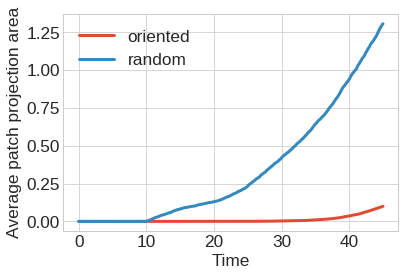

In [8]:
dir_directed = 'exp-mesenchymal_condensation/20200316-134749/'
dir_random = 'exp-mesenchymal_condensation/20200316-144234/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times.shape)
for seed in range(10):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /10

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random + '0/results_from_time_0/') 

ppa_av_r = np.zeros(times.shape)
for seed in range(10):
    ppa_av_r = ppa_av_r + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_r = ppa_av_r /10


plt.plot(times_d, ppa_av_d, label='oriented')
plt.plot(times_r, ppa_av_r, label='random')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

# Less distance between boundaries

- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 6.0
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200323-164235/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 6.0
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 6.0, random division directions
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200323-164817/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 6.0 --rdd
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 5.0
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200323-171206/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 5.0
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 5.0, random division directions
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200323-170821/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 5.0 --rdd
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 4.0
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200323-173457/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 4.0
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 4.0, random division directions
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200323-172719/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 4.0 --rdd  

Text(0,0.5,'Average patch projection area')

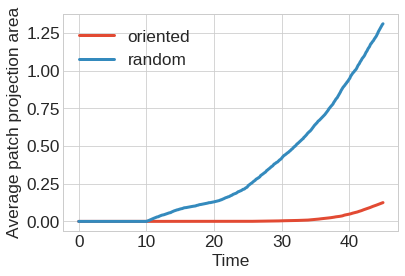

In [10]:
dir_directed = 'exp-mesenchymal_condensation/20200323-164235/'
dir_random = 'exp-mesenchymal_condensation/20200323-164817/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times.shape)
for seed in range(10):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /10

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random + '0/results_from_time_0/') 

ppa_av_r = np.zeros(times.shape)
for seed in range(10):
    ppa_av_r = ppa_av_r + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_r = ppa_av_r /10


plt.plot(times_d, ppa_av_d, label='oriented')
plt.plot(times_r, ppa_av_r, label='random')
plt.title('distance 6.0')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

Text(0,0.5,'Average patch projection area')

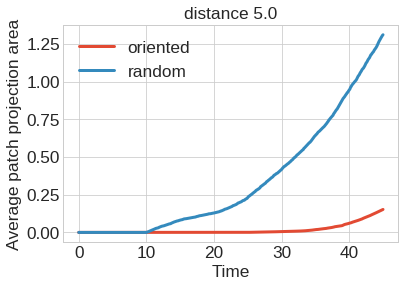

In [26]:
dir_directed = 'exp-mesenchymal_condensation/20200323-171206/'
dir_random = 'exp-mesenchymal_condensation/20200323-170821/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times.shape)
for seed in range(10):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /10

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random + '0/results_from_time_0/') 

ppa_av_r = np.zeros(times.shape)
for seed in range(10):
    ppa_av_r = ppa_av_r + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_r = ppa_av_r /10


plt.plot(times_d, ppa_av_d, label='oriented')
plt.plot(times_r, ppa_av_r, label='random')
plt.legend()
plt.title('distance 5.0')
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

Text(0,0.5,'Average patch projection area')

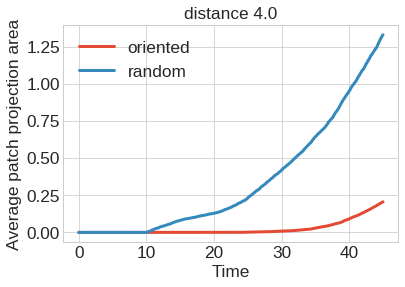

In [32]:
dir_directed = 'exp-mesenchymal_condensation/20200323-173457/'
dir_random = 'exp-mesenchymal_condensation/20200323-172719/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times.shape)
for seed in range(10):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /10

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random + '0/results_from_time_0/') 

ppa_av_r = np.zeros(times.shape)
for seed in range(10):
    ppa_av_r = ppa_av_r + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_r = ppa_av_r /10


plt.plot(times_d, ppa_av_d, label='oriented')
plt.plot(times_r, ppa_av_r, label='random')
plt.legend()
plt.title('distance 4.0')
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

Text(0,0.5,'Average patch projection area')

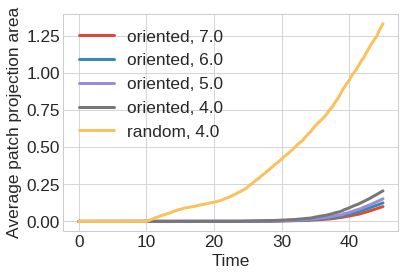

In [9]:
dirs_directed = ['exp-mesenchymal_condensation/20200316-134749/',
                 'exp-mesenchymal_condensation/20200323-164235/',
                 'exp-mesenchymal_condensation/20200323-171206/',
                 'exp-mesenchymal_condensation/20200323-173457/'
                ]
dirs_random = ['exp-mesenchymal_condensation/20200316-144234/',
               'exp-mesenchymal_condensation/20200323-164817/',
               'exp-mesenchymal_condensation/20200323-170821/',
               'exp-mesenchymal_condensation/20200323-172719/'
              ]
labels = ['7.0', '6.0', '5.0','4.0']
i = 0
for dir_directed, dir_random in zip(dirs_directed, dirs_random):
    # time steps are consistent across runs, so it's sufficient to load them from a single path
    times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

    ppa_av_d = np.zeros(times_d.shape)
    for seed in range(10):
        ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d /10

    # time steps are consistent across runs, so it's sufficient to load them from a single path
    times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random + '0/results_from_time_0/') 

    ppa_av_r = np.zeros(times_r.shape)
    for seed in range(10):
        ppa_av_r = ppa_av_r + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_r = ppa_av_r /10


    plt.plot(times_d, ppa_av_d, label='oriented, '+labels[i])
    #plt.plot(times_r, ppa_av_r, label='random')
    i = i+1
plt.plot(times_r, ppa_av_r, label='random, 4.0')    
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

# Longer simulation (final time 100h)

- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 4.0, t_final 100 h
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200324-134907/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 4.0
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 7.0, t_final 100 h
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200324-142012/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 7.0

Text(0,0.5,'Average patch projection area')

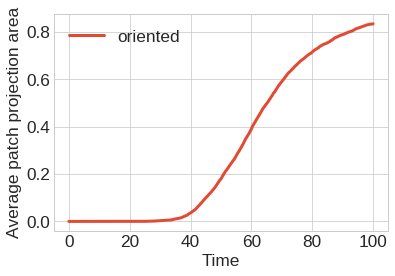

In [24]:
dir_directed = 'exp-mesenchymal_condensation/20200324-142012/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(10):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /10


plt.plot(times_d, ppa_av_d, label='oriented')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

Text(0,0.5,'Average patch projection area')

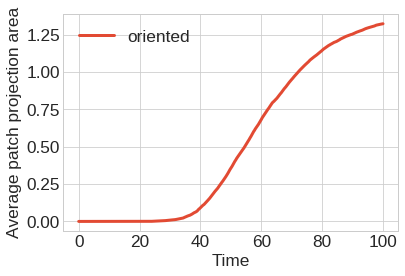

In [15]:
dir_directed = 'exp-mesenchymal_condensation/20200324-134907/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(10):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /10


plt.plot(times_d, ppa_av_d, label='oriented')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

Text(0,0.5,'#cells (av)')

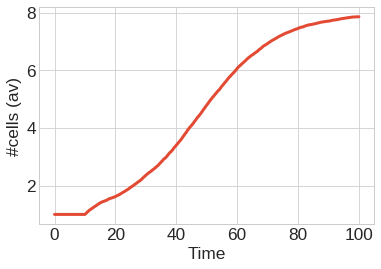

In [19]:
n_cells_av_d = np.zeros(times_d.shape)
for seed in range(10):
    n_cells_av_d = n_cells_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_ncells_av.txt', dtype=float)
n_cells_av_d = n_cells_av_d /10


plt.plot(times_d, n_cells_av_d)
#plt.legend()
plt.xlabel('Time')
plt.ylabel('#cells (av)')

# Different activation percentages

- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 7.0, t_final 100 h, activation percentage of 0.25
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200324-154352/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.25 --F pwq --mu_R 80.0 --p 0.1 --u 7.0
- 10 random seeds (0--9), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 7.0, t_final 100 h, activation percentage of 0.75
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200324-155450/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 80.0 --p 0.1 --u 7.0

Text(0,0.5,'Average patch projection area')

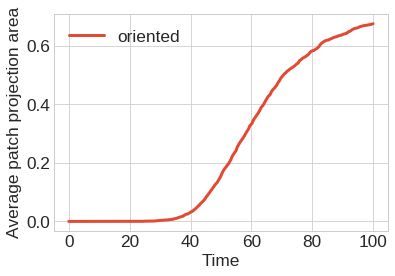

In [28]:
dir_directed = 'exp-mesenchymal_condensation/20200324-154352/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(10):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /10


plt.plot(times_d, ppa_av_d, label='oriented')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

Text(0,0.5,'Average patch projection area')

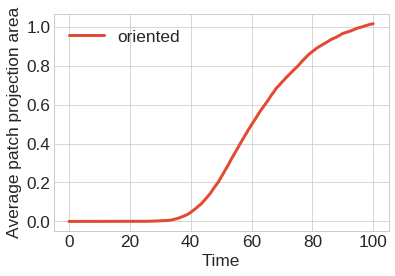

In [32]:
dir_directed = 'exp-mesenchymal_condensation/20200324-155450/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(10):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /10


plt.plot(times_d, ppa_av_d, label='oriented')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

# With the PatchSizeTrackingModifier

- 1 random seed (0), TransitCellG1Duration=10, maxTransitGenerations=2, distance between boundaries 5.0, t_final 80 h, activation percentage of 0.75 (no post-processing yet)
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200327-100833/ --S 0 --sbt --T 80.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 80.0 --p 0.1 --u 5.0
- 10 random seeds (0--9), activation percentage of 0.5
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200327-113528/ --S 0 --sbt --T 80.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 5.0

Text(0,0.5,'Average patch projection area')

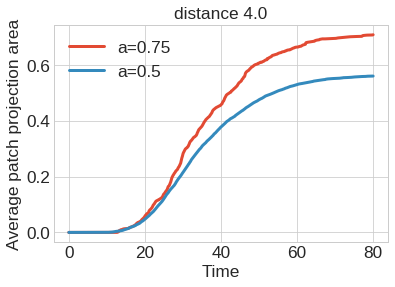

In [8]:
dir_directed = 'exp-mesenchymal_condensation/20200327-100833/'
dir_random = 'exp-mesenchymal_condensation/20200327-113528/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(1):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /1

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random + '0/results_from_time_0/') 

ppa_av_r = np.zeros(times_r.shape)
for seed in range(10):
    ppa_av_r = ppa_av_r + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_r = ppa_av_r /10


plt.plot(times_d, ppa_av_d, label='a=0.75')
plt.plot(times_r, ppa_av_r, label='a=0.5')
plt.legend()
plt.title('distance 4.0')
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

# With PatchSizeLimit set to 4 cells

- 8 random seeds (0--7), activation percentage of 0.5
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-mesenchymal_condensation/20200403-150010/ --S 0 --sbt --T 80.0 --sw 10 --sd 20 --mu 0.0 --A 0.5 --F pwq --mu_R 80.0 --p 0.1 --u 3.0 --psl 4


Text(0,0.5,'Average patch projection area')

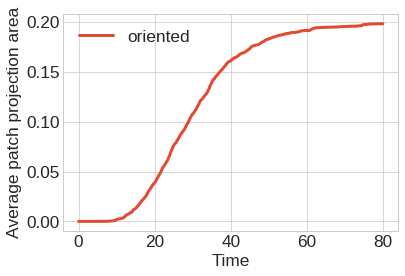

In [12]:
dir_directed = 'exp-mesenchymal_condensation/20200403-150010/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='oriented')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

In [4]:
dire = 'exp-mesenchymal_condensation/20200327-113528/'
de.run_postprocessing_multiple_random_seeds(10, dire)

['/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200327-113528/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200327-113528/1/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200327-113528/2/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200327-113528/3/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200327-113528/4/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200327-113528/5/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200327-113528/6/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-mesenchymal_condensation/20200327-113528/7/results_from_time_0/', '/home/kubuntu1804/Documents/sf

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
